In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2

In [2]:
def read_pickle(directory):
    f = open(directory,"rb")
    X = pickle.load(f)
    return np.array(X)

In [3]:
base_dir = '/content/drive/Shareddrives/TUNEX/'

X_train = read_pickle(base_dir+'X_Train.pickle')/255.0
y_train = read_pickle(base_dir+"y_Train.pickle")
X_val = read_pickle(base_dir+'X_val.pickle')/255.0
y_val = read_pickle(base_dir+"y_val.pickle")

In [19]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2], -1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1], X_val.shape[2], -1)

In [5]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

In [25]:
model = Sequential([
                    Conv2D(32,(3,3), padding='same', activation='relu',input_shape=(48, 48, 1)),
                    BatchNormalization(),
                    MaxPooling2D((2,2)),
                    Dropout(0.25),

                    Conv2D(32,(3,3), activation='relu',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2,2)),
                    Dropout(0.25),

                    Conv2D(32,(3,3), activation='relu',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2,2)),
                    Dropout(0.25),

                    Conv2D(32,(3,3), activation='relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2,2)),
                    Dropout(0.25),

                    Flatten(),

                    Dense(256, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(7, activation='softmax'),

])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)       

In [27]:
opt = Adam(lr=0.0005)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [28]:
history = model.fit(
    X_train, y_train,
    epochs = 100,
    validation_data=(X_val, y_val),
    batch_size = 32
)

Epoch 1/100
901/901 [==============================] - 5s 5ms/step - loss: 1.7904 - accuracy: 0.2600 - val_loss: 1.5709 - val_accuracy: 0.3864
Epoch 2/100
901/901 [==============================] - 4s 5ms/step - loss: 1.5939 - accuracy: 0.3704 - val_loss: 1.4628 - val_accuracy: 0.4377
Epoch 3/100
901/901 [==============================] - 4s 5ms/step - loss: 1.4814 - accuracy: 0.4249 - val_loss: 1.6063 - val_accuracy: 0.3735
Epoch 4/100
901/901 [==============================] - 4s 5ms/step - loss: 1.4084 - accuracy: 0.4549 - val_loss: 1.3092 - val_accuracy: 0.4938
Epoch 5/100
901/901 [==============================] - 4s 5ms/step - loss: 1.3531 - accuracy: 0.4739 - val_loss: 1.4924 - val_accuracy: 0.4324
Epoch 6/100
901/901 [==============================] - 4s 5ms/step - loss: 1.3138 - accuracy: 0.4943 - val_loss: 1.4809 - val_accuracy: 0.4348
Epoch 7/100
901/901 [==============================] - 4s 5ms/step - loss: 1.2694 - accuracy: 0.5111 - val_loss: 1.2379 - val_accuracy: 0.5243

In [29]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

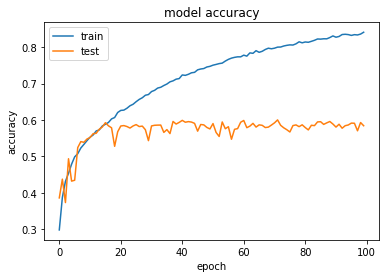

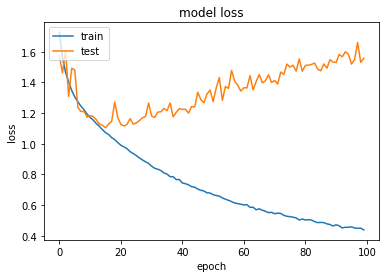

In [30]:
plot_history(history)

In [31]:
def save_model(curr_model, name):
    curr_model.save('/content/drive/MyDrive/Models/'+name+'.h5')
    curr_model.save('/content/drive/MyDrive/Models/'+name+'.model')

In [32]:
save_model(model, 'model_1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/model_1.model/assets


In [35]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras import layers
RN50 = ResNet50(weights= None, include_top=False, input_shape= (48,48,1))
input = RN50.output
input = layers.GlobalAveragePooling2D()(input)
# input = layers.Dropout(0.2)
fpred = layers.Dense(7, activation = 'softmax')(input)
model2 = tf.keras.models.Model(inputs = RN50.input, outputs = fpred)

In [37]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [38]:
history = model2.fit(
    X_train, y_train,
    epochs = 100,
    validation_data=(X_val, y_val),
    batch_size = 32
)

Epoch 1/100
901/901 [==============================] - 50s 50ms/step - loss: 2.1190 - accuracy: 0.2648 - val_loss: 1.9816 - val_accuracy: 0.3242
Epoch 2/100
901/901 [==============================] - 43s 48ms/step - loss: 1.6146 - accuracy: 0.4103 - val_loss: 2.2903 - val_accuracy: 0.2920
Epoch 3/100
901/901 [==============================] - 43s 48ms/step - loss: 1.4767 - accuracy: 0.4513 - val_loss: 2.2855 - val_accuracy: 0.1451
Epoch 4/100
901/901 [==============================] - 43s 47ms/step - loss: 1.6755 - accuracy: 0.3829 - val_loss: 1.5149 - val_accuracy: 0.4407
Epoch 5/100
901/901 [==============================] - 43s 48ms/step - loss: 1.3941 - accuracy: 0.4837 - val_loss: 1.7142 - val_accuracy: 0.2634
Epoch 6/100
901/901 [==============================] - 43s 48ms/step - loss: 1.4188 - accuracy: 0.4704 - val_loss: 2.6928 - val_accuracy: 0.2546
Epoch 7/100
901/901 [==============================] - 43s 48ms/step - loss: 1.3350 - accuracy: 0.5121 - val_loss: 1.4347 - val_ac

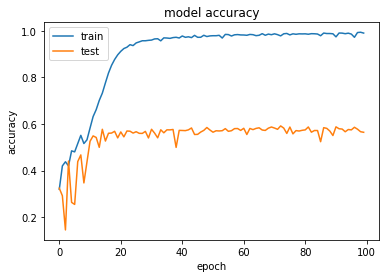

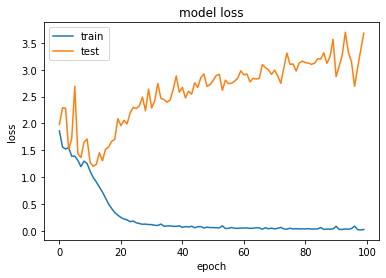

In [39]:
plot_history(history)

In [40]:
save_model(model2, 'model_2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/model_2.model/assets
